# Hw2 of Applied Machine Learning
### Shuai Hao (sh3831)

## Classification on the ‘credit-g’ dataset
[This German credit dataset](https://www.openml.org/d/31) classifies people described by a set of attributes as good or bad credit risks. The data were donated by Dr. Hans Hofmann in 1994.

In [0]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np                                                                                                  

In [0]:
X, y = fetch_openml('credit-g', return_X_y=True, as_frame=True)

In [0]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [0]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): [good, bad]

## 1.1 Determine which features are continuous and which are categorical.
**Continuous features:**

duration, credit amount, installment_commitment, residence_since, age, existing_credits, num_dependents

**Categorical features:**

checking status, credit history, purpose, saving status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, own_telephone, foreign_worker

## 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target.

In [0]:
y_label = ["good", "bad"]
y_freq = [len(y[y=='good']), len(y[y=='bad'])]

**Histogram of each continuous feature and the distribution of the target**

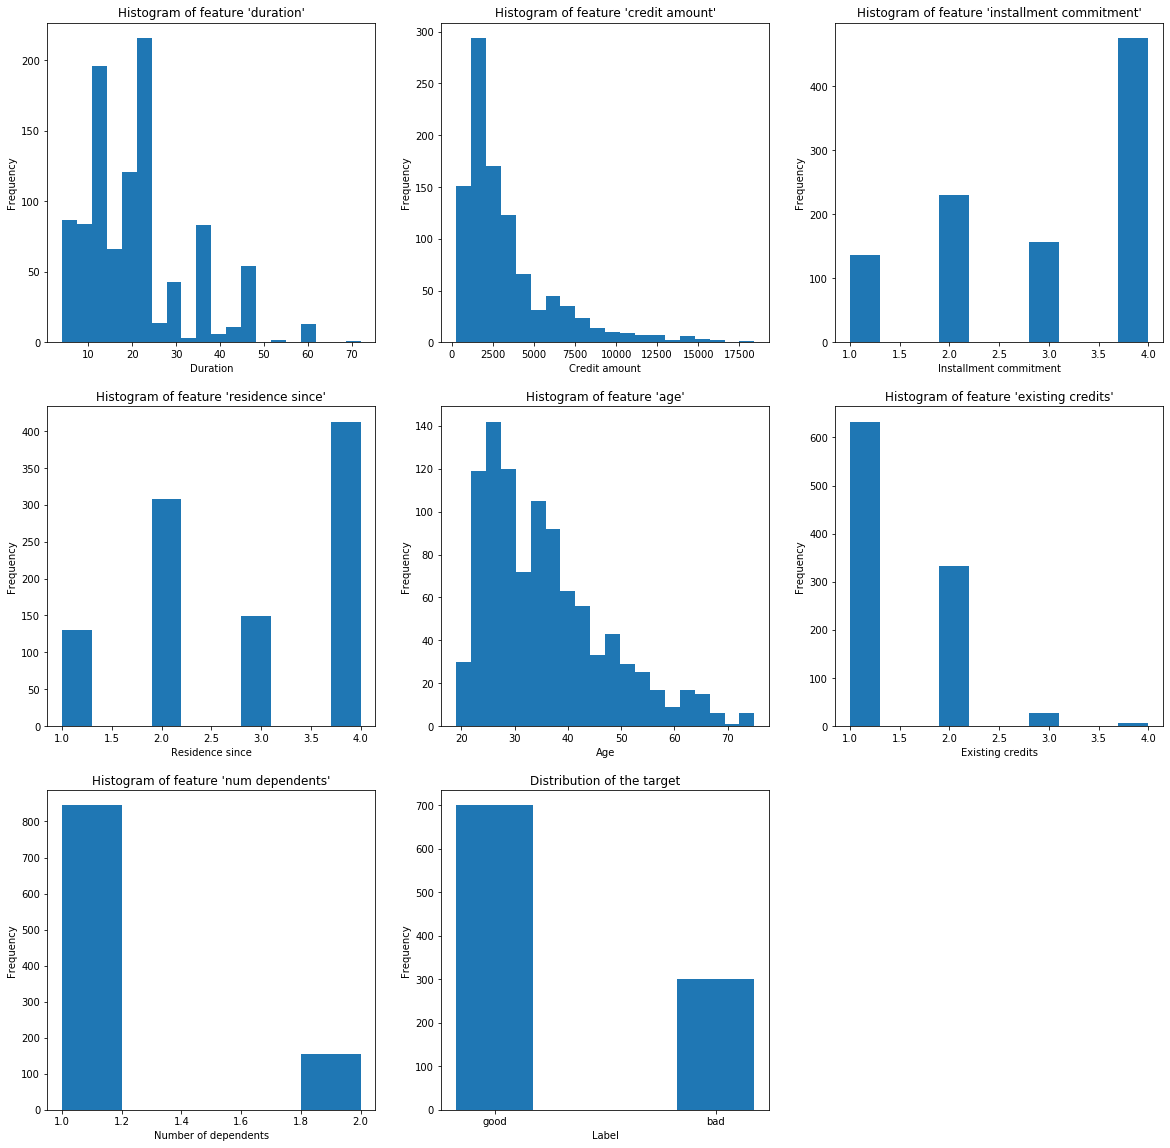

In [0]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax[0][0].hist(x = X["duration"], bins=20)
ax[0][0].set_xlabel("Duration")
ax[0][0].set_ylabel("Frequency")
ax[0][0].title.set_text("Histogram of feature 'duration'")
ax[0][1].hist(x = X["credit_amount"], bins=20)
ax[0][1].set_xlabel("Credit amount")
ax[0][1].set_ylabel("Frequency")
ax[0][1].title.set_text("Histogram of feature 'credit amount'")
ax[0][2].hist(x = X["installment_commitment"], bins=10)
ax[0][2].set_xlabel("Installment commitment")
ax[0][2].set_ylabel("Frequency")
ax[0][2].title.set_text("Histogram of feature 'installment commitment'")
ax[1][0].hist(x = X["residence_since"], bins=10)
ax[1][0].set_xlabel("Residence since")
ax[1][0].set_ylabel("Frequency")
ax[1][0].title.set_text("Histogram of feature 'residence since'")
ax[1][1].hist(x = X["age"], bins=20)
ax[1][1].set_xlabel("Age")
ax[1][1].set_ylabel("Frequency")
ax[1][1].title.set_text("Histogram of feature 'age'")
ax[1][2].hist(x = X["existing_credits"], bins=10)
ax[1][2].set_xlabel("Existing credits")
ax[1][2].set_ylabel("Frequency")
ax[1][2].title.set_text("Histogram of feature 'existing credits'")
ax[2][0].hist(x = X["num_dependents"], bins=5)
ax[2][0].set_xlabel("Number of dependents")
ax[2][0].set_ylabel("Frequency")
ax[2][0].title.set_text("Histogram of feature 'num dependents'")
ax[2][1].bar(np.arange(len(y_label)), y_freq, 0.35)
ax[2][1].set_xticks(np.arange(len(y_label)))
ax[2][1].set_xticklabels(y_label)
ax[2][1].set_xlabel("Label")
ax[2][1].set_ylabel("Frequency")
ax[2][1].title.set_text("Distribution of the target")
fig.delaxes(ax[2][2])
plt.show()

**Box plot of each continuous feature**

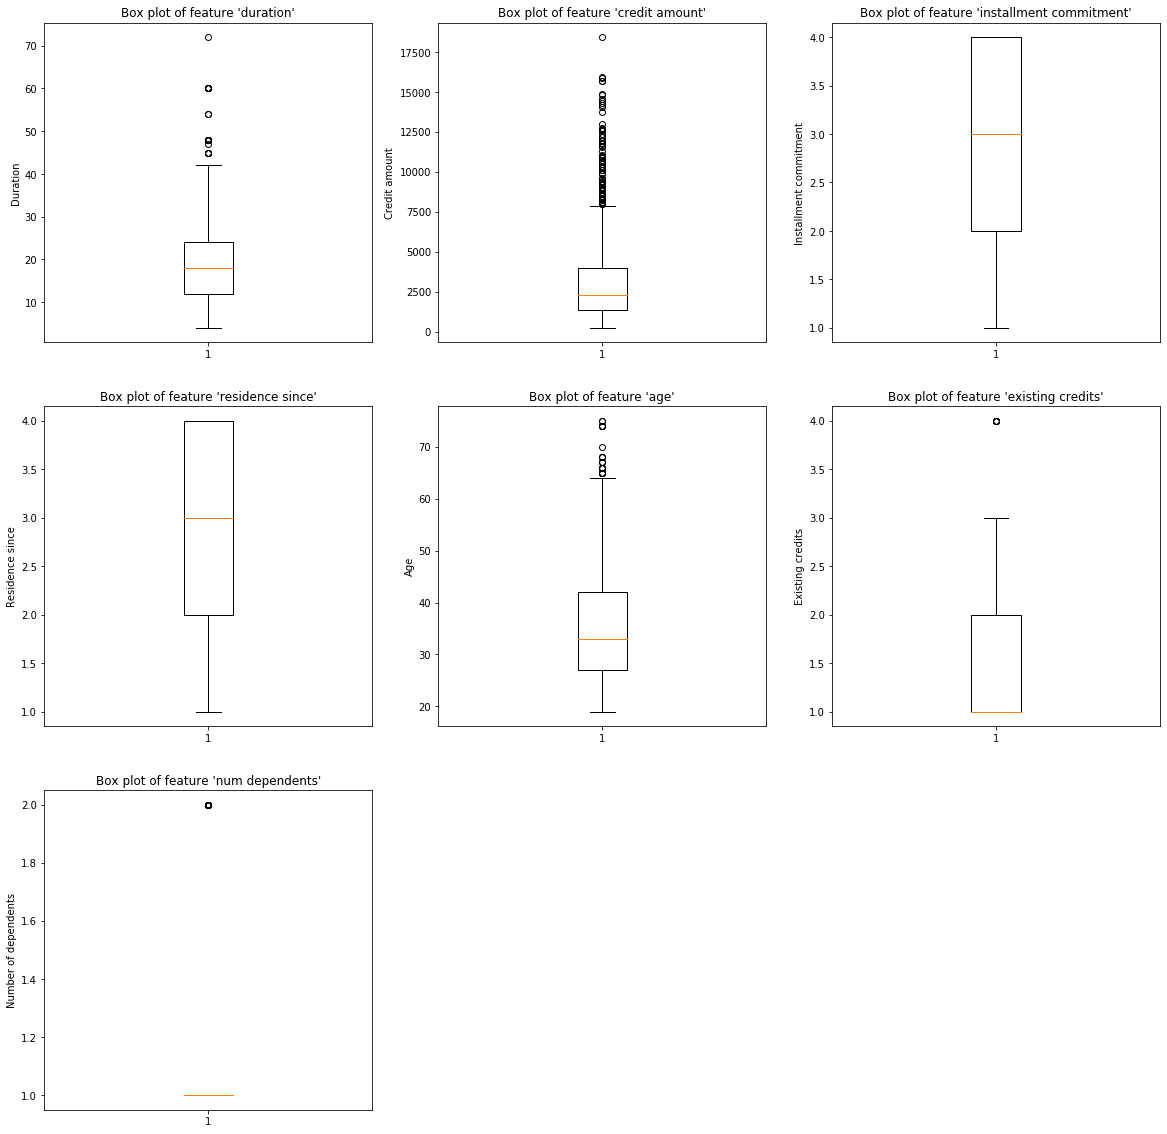

In [0]:
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax[0][0].boxplot(x = X["duration"])
ax[0][0].set_ylabel("Duration")
ax[0][0].title.set_text("Box plot of feature 'duration'")
ax[0][1].boxplot(x = X["credit_amount"])
ax[0][1].set_ylabel("Credit amount")
ax[0][1].title.set_text("Box plot of feature 'credit amount'")
ax[0][2].boxplot(x = X["installment_commitment"])
ax[0][2].set_ylabel("Installment commitment")
ax[0][2].title.set_text("Box plot of feature 'installment commitment'")
ax[1][0].boxplot(x = X["residence_since"])
ax[1][0].set_ylabel("Residence since")
ax[1][0].title.set_text("Box plot of feature 'residence since'")
ax[1][1].boxplot(x = X["age"])
ax[1][1].set_ylabel("Age")
ax[1][1].title.set_text("Box plot of feature 'age'")
ax[1][2].boxplot(x = X["existing_credits"])
ax[1][2].set_ylabel("Existing credits")
ax[1][2].title.set_text("Box plot of feature 'existing credits'")
ax[2][0].boxplot(x = X["num_dependents"])
ax[2][0].set_ylabel("Number of dependents")
ax[2][0].title.set_text("Box plot of feature 'num dependents'")
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

## 1.3 Split data into training and test set. 
Do not use the test set until a final evaluation in 1.5. Preprocess the data (such as treatment of categorical variables) without using a pipeline and
evaluate an initial LogisticRegression model with an training/validation split.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
10,0<=X<200,12.0,existing paid,new car,1295.0,<100,<1,3.0,female div/dep/mar,none,1.0,car,25.0,none,rent,1.0,skilled,1.0,none,yes
691,0<=X<200,15.0,existing paid,repairs,2631.0,100<=X<500,1<=X<4,3.0,female div/dep/mar,none,2.0,real estate,25.0,none,own,1.0,unskilled resident,1.0,none,yes
666,0<=X<200,30.0,all paid,furniture/equipment,3496.0,>=1000,1<=X<4,4.0,male single,none,2.0,car,34.0,stores,own,1.0,skilled,2.0,yes,yes
138,0<=X<200,15.0,critical/other existing credit,radio/tv,2728.0,no known savings,4<=X<7,4.0,male single,guarantor,2.0,real estate,35.0,bank,own,3.0,skilled,1.0,yes,yes
295,0<=X<200,48.0,existing paid,furniture/equipment,9960.0,<100,<1,1.0,female div/dep/mar,none,2.0,car,26.0,none,own,1.0,skilled,1.0,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0<=X<200,12.0,existing paid,radio/tv,6468.0,no known savings,unemployed,2.0,male single,none,1.0,no known property,52.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
165,no checking,6.0,existing paid,furniture/equipment,2978.0,500<=X<1000,1<=X<4,1.0,male single,none,2.0,car,32.0,none,own,1.0,skilled,1.0,yes,yes
388,0<=X<200,15.0,critical/other existing credit,business,2326.0,500<=X<1000,1<=X<4,2.0,male single,none,4.0,car,27.0,bank,own,1.0,skilled,1.0,none,yes
917,<0,6.0,existing paid,new car,14896.0,<100,>=7,1.0,male single,none,4.0,no known property,68.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes


In [0]:
X_train["checking_status"] = X_train.checking_status.astype("category").cat.codes
X_train["savings_status"] = X_train.savings_status.astype("category").cat.codes
X_train["employment"] = X_train.employment.astype("category").cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
10,1,12.0,existing paid,new car,1295.0,0,1,3.0,female div/dep/mar,none,1.0,car,25.0,none,rent,1.0,skilled,1.0,none,yes
691,1,15.0,existing paid,repairs,2631.0,1,2,3.0,female div/dep/mar,none,2.0,real estate,25.0,none,own,1.0,unskilled resident,1.0,none,yes
666,1,30.0,all paid,furniture/equipment,3496.0,3,2,4.0,male single,none,2.0,car,34.0,stores,own,1.0,skilled,2.0,yes,yes
138,1,15.0,critical/other existing credit,radio/tv,2728.0,4,3,4.0,male single,guarantor,2.0,real estate,35.0,bank,own,3.0,skilled,1.0,yes,yes
295,1,48.0,existing paid,furniture/equipment,9960.0,0,1,1.0,female div/dep/mar,none,2.0,car,26.0,none,own,1.0,skilled,1.0,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1,12.0,existing paid,radio/tv,6468.0,4,0,2.0,male single,none,1.0,no known property,52.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
165,3,6.0,existing paid,furniture/equipment,2978.0,2,2,1.0,male single,none,2.0,car,32.0,none,own,1.0,skilled,1.0,yes,yes
388,1,15.0,critical/other existing credit,business,2326.0,2,2,2.0,male single,none,4.0,car,27.0,bank,own,1.0,skilled,1.0,none,yes
917,0,6.0,existing paid,new car,14896.0,0,4,1.0,male single,none,4.0,no known property,68.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes


In [0]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')
onehot_enc.fit(X_train)
X_train_enc = onehot_enc.transform(X_train).toarray()

In [0]:
l_enc = LabelEncoder()
l_enc.fit(y_train)
y_train_enc = l_enc.transform(y_train)

In [0]:
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train_enc, y_train_enc)

In [0]:
clf = LogisticRegression().fit(X_train_new, y_train_new)
clf.score(X_valid, y_valid)

0.7074468085106383

## 1.4 Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). 
Evaluate
Logistic Regression, linear support vector machines and nearest neighbors using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
l_enc = LabelEncoder()
l_enc.fit(y_train)
y_train_enc = l_enc.transform(y_train)

In [0]:
categorical = X_train.dtypes == 'category'

preprocess_scale = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
preprocess_noscale = make_column_transformer(
    ('passthrough', ~categorical),
    (OneHotEncoder(), categorical))

model_scale_lr = make_pipeline(preprocess_scale, LogisticRegression())
model_scale_svm = make_pipeline(preprocess_scale, LinearSVC(dual=False))
model_scale_knn = make_pipeline(preprocess_scale, KNeighborsClassifier())
model_noscale_lr = make_pipeline(preprocess_noscale, LogisticRegression())
model_noscale_svm = make_pipeline(preprocess_noscale, LinearSVC(dual=False))
model_noscale_knn = make_pipeline(preprocess_noscale, KNeighborsClassifier())

In [0]:
scores = cross_val_score(model_scale_lr, X_train, y_train_enc)
np.mean(scores)

0.7666666666666666

In [0]:
scores = cross_val_score(model_scale_svm, X_train, y_train_enc)
np.mean(scores)

0.7706666666666667

In [0]:
scores = cross_val_score(model_scale_knn, X_train, y_train_enc)
np.mean(scores)

0.74

In [0]:
scores = cross_val_score(model_noscale_lr, X_train, y_train_enc)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.768

In [0]:
scores = cross_val_score(model_noscale_svm, X_train, y_train_enc)
np.mean(scores)

0.7653333333333333

In [0]:
scores = cross_val_score(model_noscale_knn, X_train, y_train_enc)
np.mean(scores)

0.6706666666666666

I set the parameter 'dual' equals to false for the linear SVM model, because in our dataset the number of samples is larger than the number of features.

If I don't scale the data, the logistic regression model doesn't coverge and its score is 0.768. The linear SVM model's score is 0.765 and the KNN model's score is only 0.671.

After I scale the data, the linear SVM and the KNN model's scores improved:

*   Logistic regression: 0.767
*   Linear SVM: 0.771
*   KNN: 0.74

As the professor said in class, scaling helps improve the score of the KNN model a lot. The linear SVM model's score slightly improves, and the logistic regression model's score doesn't change that much.


## 1.5 Tune the parameters using GridSearchCV. Do the results improve? Evaluate the model only on the test set.
Visualize the performance as function of the parameters for all three models.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
categorical = X_train.dtypes == 'category'

preprocess_scale = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

In [0]:
l_enc = LabelEncoder()
y_test_enc = l_enc.fit_transform(y_test)
y_train_enc = l_enc.fit_transform(y_train)

In [0]:
LogisticRegression().get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [0]:
LinearSVC().get_params

<bound method BaseEstimator.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)>

In [0]:
KNeighborsClassifier().get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [0]:
C_space = np.logspace(-3, 3, 7)
N_neighbors_space = [3, 4, 5, 6, 7]

In [0]:
pipe = Pipeline([('scaler', preprocess_scale),
                 ('regressor', LogisticRegression())])

param_grid = [{'regressor': [LogisticRegression(solver='liblinear')],
               'regressor__C': C_space,
               'scaler': [preprocess_scale]},
              {'regressor': [LinearSVC(dual=False)],
               'regressor__C': C_space,
               'scaler': [preprocess_scale]},
              {'regressor': [KNeighborsClassifier()],
               'regressor__n_neighbors': N_neighbors_space,
               'scaler': [preprocess_scale]}
             ]


In [0]:
grid = GridSearchCV(pipe, param_grid, return_train_score=True)
grid.fit(X_train, y_train_enc)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         checking_status           False
duration                   True
credit_history      

In [0]:
grid.score(X_test, y_test_enc)

0.748

In [0]:
grid.best_params_

{'regressor': LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 'regressor__C': 0.1,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  checking_status           False
 duration                   True
 credit_history            False
 purpose                   False
 credit_amount              True
 savings_status            False
 employment                False
 installment_commitment     True
 personal_status           False
 other_part...
                                  checking_status            Tru

In [0]:
cross_val_train_score = grid.cv_results_['mean_train_score']
cross_val_test_score = grid.cv_results_['mean_test_score']
cross_val_train_std = grid.cv_results_['std_train_score']
cross_val_test_std = grid.cv_results_['std_test_score']

In [0]:
def plot_score(name, X, train_score, test_score, train_std, test_std, log=True):
    # figure = plt.subplots(1, 3, figsize=(20,5))
    plt.plot(X, train_score, color='blue', label='mean_train_score')
    plt.fill_between(X, train_score + train_std, train_score - train_std, color='blue', alpha=0.3)
    plt.plot(X, test_score, color='orange', label='mean_test_score')
    plt.fill_between(X, test_score + test_std, test_score - test_std, color='orange', alpha=0.3)
    if log == True:
        plt.xscale("log")
    plt.title(name)
    plt.legend()
    plt.show()

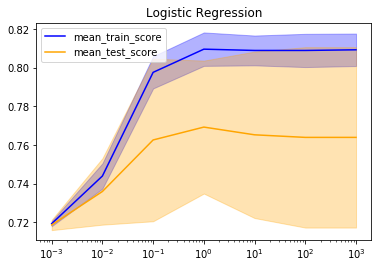

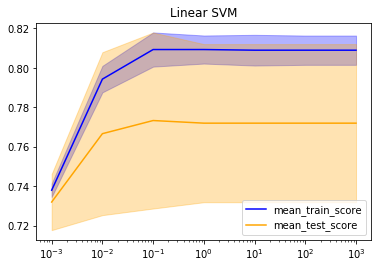

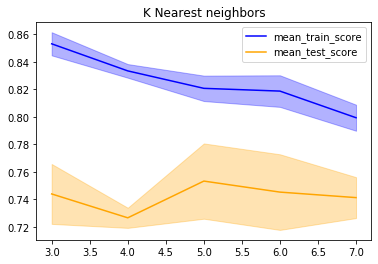

In [0]:
plot_score("Logistic Regression", C_space, cross_val_train_score[:7], cross_val_test_score[:7], cross_val_train_std[:7], cross_val_test_std[:7])
plot_score("Linear SVM", C_space, cross_val_train_score[7:14], cross_val_test_score[7:14], cross_val_train_std[7:14], cross_val_test_std[7:14])
plot_score("K Nearest neighbors", N_neighbors_space, cross_val_train_score[14:19], cross_val_test_score[14:19], cross_val_train_std[14:19], cross_val_test_std[14:19], log=False)
# fig, ax = plt.subplots(1, 3, figsize=(20,5))
# ax[0].plot(C_space, cross_val_train_score[:7], color='blue')
# ax[0].fill_between(C_space, cross_val_train_score[:7] + cross_val_train_std[:7], cross_val_train_score[:7] - cross_val_train_std[:7], color='lightblue')
# ax[0].plot(C_space, cross_val_test_score[:7], color='orange')
# ax[0].fill_between(C_space, cross_val_test_score[:7] + cross_val_test_std[:7], cross_val_test_score[:7] - cross_val_test_std[:7], color='orange', alpha=0.3)
# ax[0].set_xscale("log")
# ax[1].plot(C_space, cross_val_train_score[7:14], color='blue')
# ax[1].fill_between(C_space, cross_val_train_score[7:14] + cross_val_train_std[7:14], cross_val_train_score[7:14] - cross_val_train_std[7:14], color='lightblue')
# ax[1].plot(C_space, cross_val_test_score[7:14], color='orange')
# ax[1].fill_between(C_space, cross_val_test_score[7:14] + cross_val_test_std[7:14], cross_val_test_score[7:14] - cross_val_test_std[7:14], color='orange', alpha=0.3)
# ax[1].set_xscale("log")
# ax[2].plot(N_neighbors_space, cross_val_test_score[14:19])

The results improve and the cross validation scores become higher, because the grid search helps me find the optimal parameter settings. The test score is 0.748 for the best model.

## 1.6 Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? 
Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

**a. Change ‘stratified k-fold’ to ‘kfold’ with shuffling**

In [0]:
kf_non_random = KFold(n_splits=5, random_state=None, shuffle=True)

In [0]:
grid_kfold = GridSearchCV(pipe, param_grid, cv=kf_non_random)
grid_kfold.fit(X_train, y_train_enc)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         checking_status          

In [0]:
grid_kfold.score(X_test, y_test_enc)

0.728

In [0]:
grid_kfold.cv_results_['mean_test_score']

array([0.71866667, 0.74266667, 0.77066667, 0.764     , 0.76266667,
       0.76133333, 0.76133333, 0.73333333, 0.76933333, 0.76      ,
       0.76533333, 0.76533333, 0.76666667, 0.76666667, 0.73733333,
       0.71733333, 0.74666667, 0.74266667, 0.732     ])

In [0]:
grid_kfold.best_params_

{'regressor': LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'regressor__C': 0.1,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  checking_status           False
 duration                   True
 credit_history            False
 purpose                   False
 credit_amount              True
 savings_status            False
 employment                False
 installment_commitment     True
 personal_st

**b. Change the random seed of the shuffling**

In [0]:
kf_random = KFold(n_splits=5, random_state=0, shuffle=True)

In [0]:
grid_kfold2 = GridSearchCV(pipe, param_grid, cv=kf_random)
grid_kfold2.fit(X_train, y_train_enc)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         checking_status           Fa

In [0]:
grid_kfold2.score(X_test, y_test_enc)

0.748

In [0]:
grid_kfold2.cv_results_['mean_test_score']

array([0.71866667, 0.72933333, 0.75466667, 0.76666667, 0.76533333,
       0.764     , 0.76533333, 0.73066667, 0.756     , 0.77066667,
       0.76533333, 0.764     , 0.76533333, 0.76533333, 0.732     ,
       0.72533333, 0.73466667, 0.748     , 0.732     ])

In [0]:
grid_kfold2.best_params_

{'regressor': LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 'regressor__C': 0.1,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  checking_status           False
 duration                   True
 credit_history            False
 purpose                   False
 credit_amount              True
 savings_status            False
 employment                False
 installment_commitment     True
 personal_status           False
 other_part...
                                  checking_status            Tru

**c. Change the random state of the split into training and test data**

In [0]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, random_state = 0)

In [0]:
l_enc = LabelEncoder()
y_test_enc_new = l_enc.fit_transform(y_test_new)
y_train_enc_new = l_enc.fit_transform(y_train_new)

In [0]:
grid_kfold3 = GridSearchCV(pipe, param_grid, cv=kf_non_random)
grid_kfold3.fit(X_train_new, y_train_enc_new)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         checking_status          

In [0]:
grid_kfold3.score(X_test_new, y_test_enc_new)

0.736

In [0]:
grid_kfold3.cv_results_['mean_test_score']

array([0.69866667, 0.712     , 0.75333333, 0.76133333, 0.752     ,
       0.74933333, 0.74933333, 0.71333333, 0.756     , 0.77066667,
       0.756     , 0.75466667, 0.75466667, 0.75466667, 0.71466667,
       0.69733333, 0.73733333, 0.72266667, 0.72933333])

In [0]:
grid_kfold3.best_params_

{'regressor': LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 'regressor__C': 0.1,
 'scaler': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  checking_status           False
 duration                   True
 credit_history            False
 purpose                   False
 credit_amount              True
 savings_status            False
 employment                False
 installment_commitment     True
 personal_status           False
 other_part...
                                  checking_status            Tru

After several rounds of testing, I find the best parameters sometimes change. The original grid search shows linear SVM with parameter C = 0.1 is the best model. 

When I change the cross-validation strategy, the best model becomes the logistic regression model with parameter C = 0.1. 

When I change the random seed of the shuffling, the best parameters and the final score don't change. 

When I change or the random state of the split into training and test data, the final score of the model is different but the best parameters are the same.

## 1.7 Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.

The first model in Q1.5 has the highest test score, so I am going visualize that model to visualize important coefficients. By printing out the cross validation results for the model, I set the parameter C equal to 1 for the logistic regression model, and C equal to 0.1 for the linear SVM model.

In [0]:
grid.cv_results_['mean_test_score'][:7]

array([0.71866667, 0.736     , 0.76266667, 0.76933333, 0.76533333,
       0.764     , 0.764     ])

In [0]:
grid.cv_results_['mean_test_score'][7:14]

array([0.732     , 0.76666667, 0.77333333, 0.772     , 0.772     ,
       0.772     , 0.772     ])

In [0]:
categorical = X_train.dtypes == 'category'

preprocess_scale = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

In [0]:
optimal_model_lr = make_pipeline(preprocess_scale, LogisticRegression(C=1, solver='liblinear'))

In [0]:
optimal_model_lr.fit(X_train, y_train_enc)
scores = cross_val_score(optimal_model_lr, X_train, y_train_enc)
np.mean(scores)

0.7693333333333333

In [0]:
non_continuous_feature_name = optimal_model_lr.steps[0][1].transformers_[1][1].get_feature_names().tolist()

In [0]:
continuous_feature_name = X_train.columns[~categorical].to_list()

In [0]:
feature_name = continuous_feature_name + non_continuous_feature_name

In [0]:
lr_coef = optimal_model_lr.steps[1][1].coef_[0]

In [0]:
lr_top20_index = sorted(range(len(lr_coef)), key=lambda i: abs(lr_coef[i]), reverse=True)[:20]

In [0]:
lr_top20_index

[12, 10, 25, 20, 41, 21, 59, 29, 18, 11, 8, 28, 32, 39, 50, 45, 24, 13, 46, 15]

In [0]:
lr_top20_feature = [feature_name[i] for i in lr_top20_index]

In [0]:
lr_coef_20 = [lr_coef[i] for i in lr_top20_index]

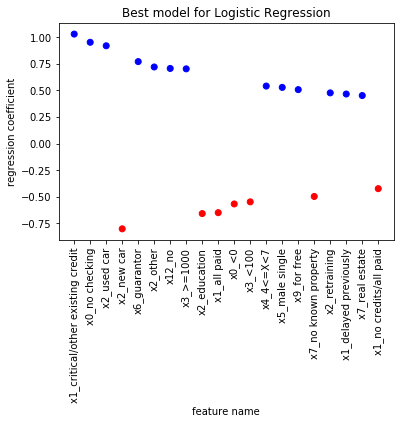

In [0]:
plt.scatter(lr_top20_feature, lr_coef_20, c=np.sign(lr_coef_20), cmap='bwr_r')
plt.xticks(rotation='vertical')
plt.xlabel("feature name")
plt.ylabel("regression coefficient")
plt.title("Best model for Logistic Regression")
plt.show()

In [0]:
optimal_model_SVM = make_pipeline(preprocess_scale, LinearSVC(C=0.1, dual=False))

In [0]:
optimal_model_SVM.fit(X_train, y_train_enc)
scores = cross_val_score(optimal_model_SVM, X_train, y_train_enc)
np.mean(scores)

0.7733333333333333

In [0]:
SVM_coef = optimal_model_SVM.steps[1][1].coef_[0]

In [0]:
SVM_top20_index = sorted(range(len(SVM_coef)), key=lambda i: abs(SVM_coef[i]), reverse=True)[:20]

In [0]:
SVM_top20_index

[12, 10, 25, 20, 41, 21, 18, 59, 11, 29, 8, 24, 45, 13, 39, 28, 32, 50, 15, 46]

In [0]:
SVM_top20_feature = [feature_name[i] for i in SVM_top20_index]

In [0]:
SVM_coef_20 = [SVM_coef[i] for i in SVM_top20_index]

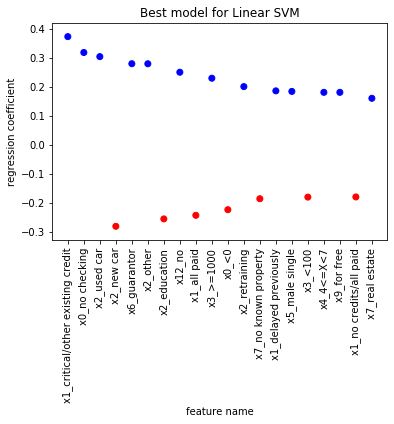

In [0]:
plt.scatter(SVM_top20_feature, SVM_coef_20, c=np.sign(SVM_coef_20), cmap='bwr_r')
plt.xticks(rotation='vertical')
plt.xlabel("feature name")
plt.ylabel("regression coefficient")
plt.title("Best model for Linear SVM")
plt.show()

From the previous two visualizations, we can tell that the existing credit history, whether the customer has checking accounts or cars is important in the decision about credit risks.